In [4]:
from helper import merge_dataframes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



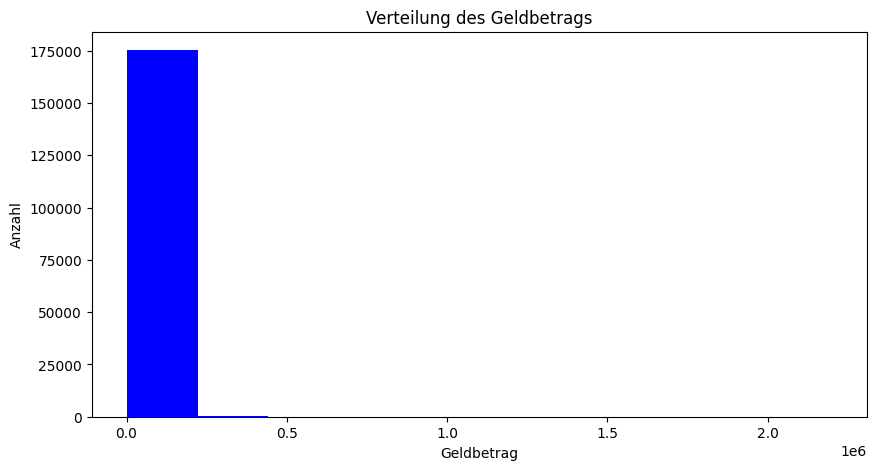

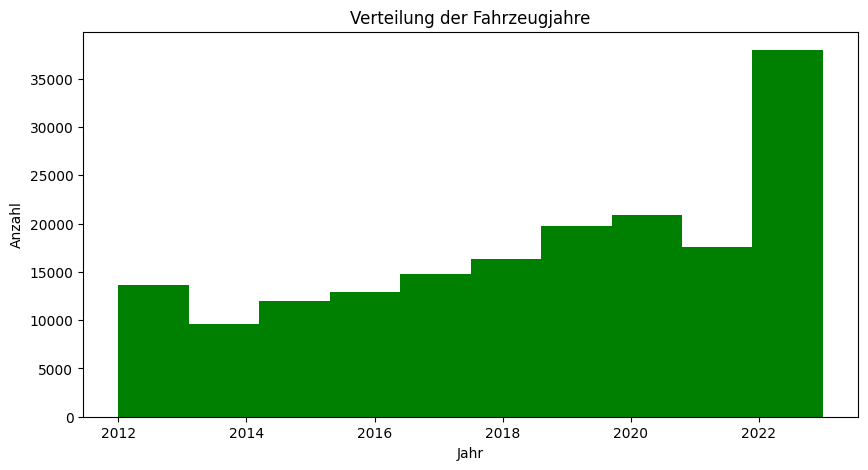

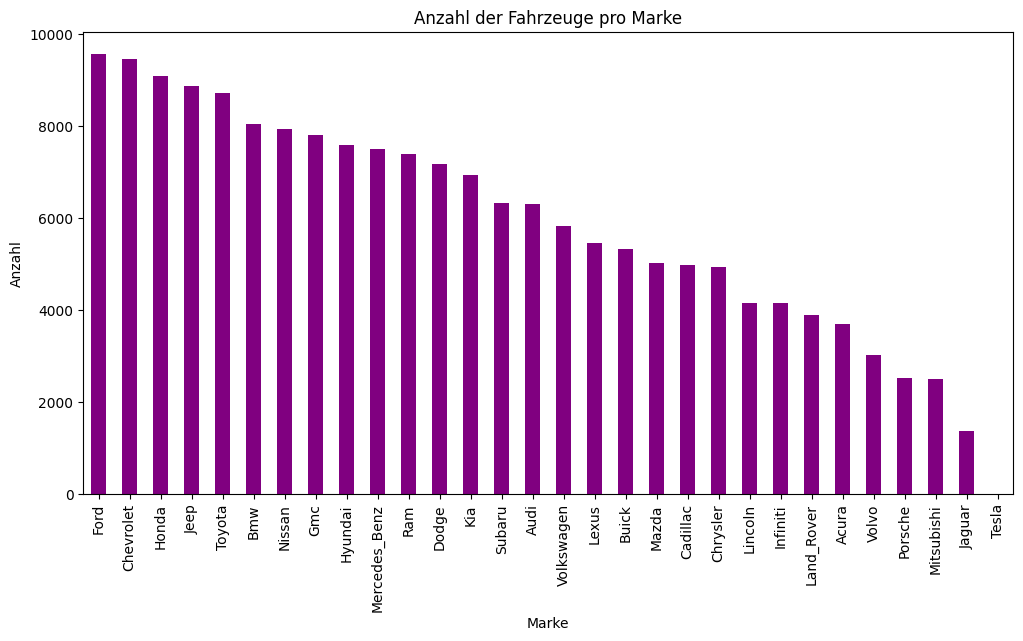

ValueError: could not convert string to float: ' 30–37'

In [6]:
# Daten einlesen
file1_path = 'data/NewYorkCars/New_York_cars_part1.csv'
file2_path = 'data/NewYorkCars/New_York_cars_part2.csv'


data = merge_dataframes(file1_path, file2_path)

# Relevanten Plots erstellen
def create_plots(data):
    # Plot 1: Verteilung des Geldbetrags
    plt.figure(figsize=(10, 5))
    plt.hist(data['money'], bins=10, color='blue')
    plt.xlabel('Geldbetrag')
    plt.ylabel('Anzahl')
    plt.title('Verteilung des Geldbetrags')
    plt.show()

    # Plot 2: Verteilung der Fahrzeugjahre
    plt.figure(figsize=(10, 5))
    plt.hist(data['Year'], bins=10, color='green')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl')
    plt.title('Verteilung der Fahrzeugjahre')
    plt.show()

    # Plot 3: Anzahl der Fahrzeuge pro Marke
    plt.figure(figsize=(12, 6))
    brand_counts = data['brand'].value_counts()
    brand_counts.plot(kind='bar', color='purple')
    plt.xlabel('Marke')
    plt.ylabel('Anzahl')
    plt.title('Anzahl der Fahrzeuge pro Marke')
    plt.show()

# Machine Learning: K-Means-Clustering und Bewertung
def perform_clustering(data):
    # Ausgewählte Merkmale für das Clustering
    features = ['money', 'MPG', 'Mileage']

    # Daten normalisieren
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])

    # K-Means-Clustering durchführen
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(scaled_data)

    # Clusteretiketten den Daten hinzufügen
    data['Cluster'] = kmeans.labels_

    # Bewertung der Autos basierend auf dem Cluster
    data['Score'] = 10 - data['Cluster']

    # Die besten bewerteten Autos auswählen
    top_cars = data.sort_values(by='Score', ascending=False).head(10)

    return top_cars

# Plots erstellen und Bewertung durchführen
create_plots(data)
top_cars = perform_clustering(data)

# Die besten bewerteten Autos als Tabelle anzeigen
top_cars_table = top_cars[['brand', 'Model', 'Score']]
print(top_cars_table)